# Описание данных:

- id — уникальный идентификатор скважины;

- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
state = RandomState(12345)

In [ ]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим на данные. Начнем с нулевого региона

In [ ]:
df_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_0.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [ ]:
df_0.duplicated().sum()

0

In [ ]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


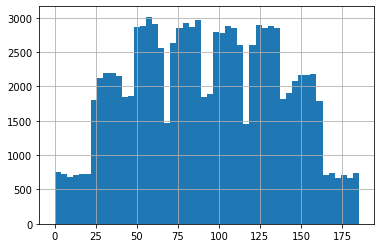

In [ ]:
df_0['product'].hist(bins=50)
plt.show()

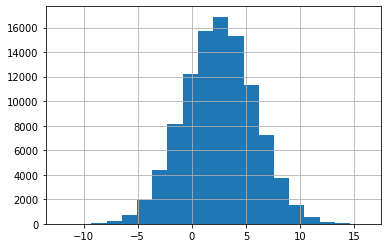

In [ ]:
df_0['f2'].hist(bins=20)
plt.show()

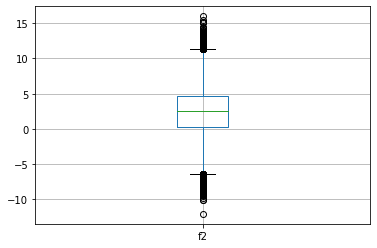

In [ ]:
df_0.boxplot(column = 'f2')
plt.show()

Данные для 0 региона изучены, пропусков и дубликатов нет, типы данных подходящие. Возможно, есть выбросы в столбце f2, но пока не буду их выбрасывать, так как данные распределены нормально для признаков f2 и product. Выделяется группа скважин со средним объемом запасов, скважин с максимальным и минимальным значениями меньше

Посмотрим на датасет 1 региона

In [ ]:
df_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_1.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [ ]:
df_1.duplicated().sum()

0

In [ ]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


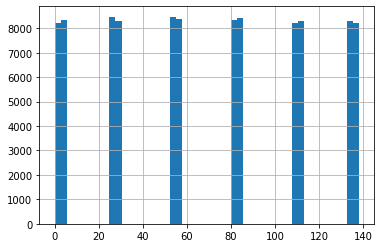

In [ ]:
df_1['product'].hist(bins=50)
plt.show()

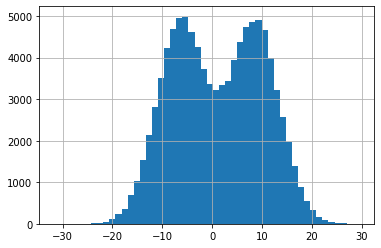

In [ ]:
df_1['f0'].hist(bins=50)
plt.show()

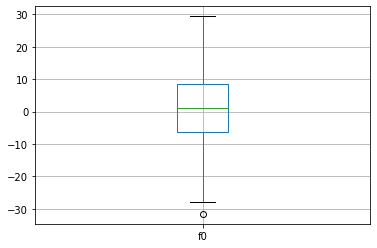

In [ ]:
df_1.boxplot(column = 'f0')
plt.show()

Данные для 1 региона изучены, пропусков и дубликатов также нет, типы данных подходящие. Разброс данных в признаках f0 и f1 значительно выше, чем в 0 локации. Данные распределены нормально только для признака f1. Выделяются, почти равные по объему запасов, группы скважин

Посмотрим на датасет 2 региона

In [ ]:
df_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_2.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [ ]:
df_2.duplicated().sum()

0

In [ ]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


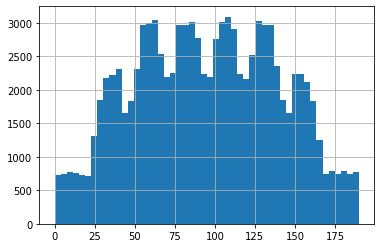

In [ ]:
df_2['product'].hist(bins=50)
plt.show()

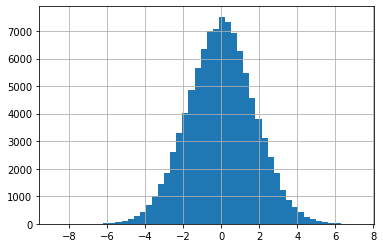

In [ ]:
df_2['f0'].hist(bins=50)
plt.show()

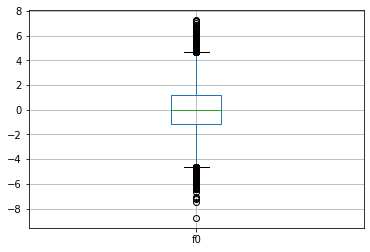

In [ ]:
df_2.boxplot(column = 'f0')
plt.show()

Данные для 3 региона изучены, пропусков и дубликатов все также нет, типы данных подходящие. Распределение и разброс данных похож на 0 регион, за исключением немного больших значений в столбцах f0 и f1.

Объединим столбцы датафрейма с объемом запасов и построим графики

In [ ]:
df_gen = df_0.join(df_1, lsuffix='_0', rsuffix='_1')

In [ ]:
df_gen = df_gen.join(df_2, lsuffix='_1', rsuffix='_2')

In [ ]:
df_gen_prod = df_gen.drop(['id_0', 'f0_0', 'f1_0', 'f2_0', 'id_1', 'f0_1', 'f1_1', 'f2_1', 'id', 'f0', 'f1', 'f2'], axis=1)

In [ ]:
df_gen_prod.rename(columns={'product': 'product_2'}, inplace=True)

Text(0, 0.5, 'Объем, тыс. баррелей')

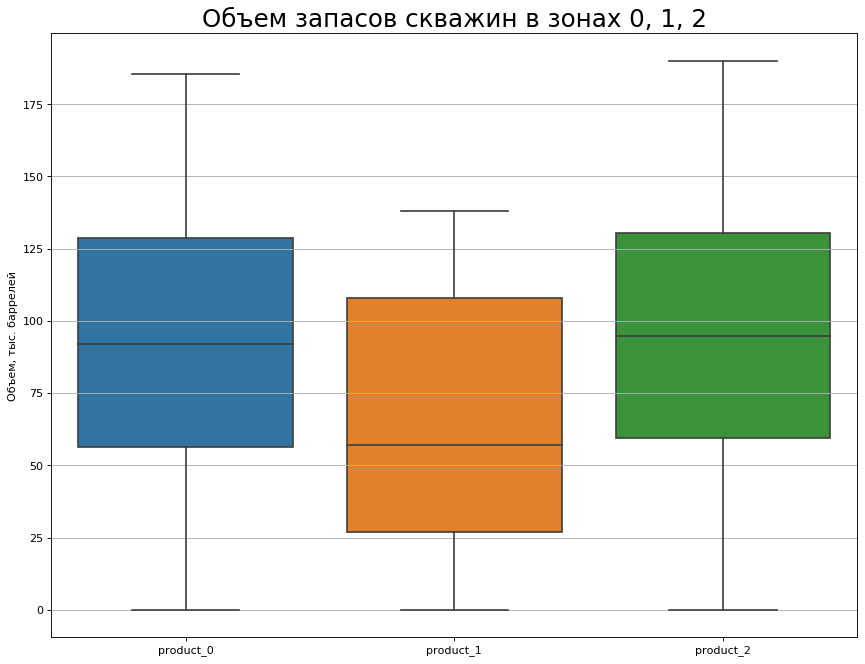

In [ ]:
plt.figure(figsize=(13,10), dpi= 80)
plt.title("Объем запасов скважин в зонах 0, 1, 2", fontsize=22)
ax = sns.boxplot(data=df_gen_prod).grid(axis='y')
plt.ylabel("Объем, тыс. баррелей")

### Вывод

Нужные библиотеки подгружены, данные подготовлены и изучены. Беглым взглядом посмотрев на сведенные боксплоты по столбцам product видно, что скважины зон 0 и 2 в среднем имеют большие запасы, чем скважины зоны 1.

## Обучение и проверка модели

Обучим и проверим модель для 0 региона

In [ ]:
features_geo_0 = df_0.drop(['id', 'product'], axis=1)
target_geo_0 = df_0['product']

In [ ]:
features_train_geo_0, features_valid_geo_0, target_train_geo_0, target_valid_geo_0 = train_test_split(
    features_geo_0, target_geo_0, test_size=0.25, random_state=12345)

In [ ]:
model_geo_0 = LinearRegression()
model_geo_0.fit(features_train_geo_0, target_train_geo_0)
predictions_valid_geo_0 = model_geo_0.predict(features_valid_geo_0)

Средний запас предсказанного сырья 0 региона составляет:

In [ ]:
predictions_valid_geo_0.mean()

92.59256778438038

In [ ]:
mse_geo_0 = mean_squared_error(target_valid_geo_0, predictions_valid_geo_0)

In [ ]:
rmse_geo_0 = mse_geo_0 ** 0.5

Средняя квадратичная ошибка 0 региона равна:

In [ ]:
rmse_geo_0

37.5794217150813

Обучим и проверим модель для 1 региона

In [ ]:
features_geo_1 = df_1.drop(['id', 'product'], axis=1)
target_geo_1 = df_1['product']

In [ ]:
features_train_geo_1, features_valid_geo_1, target_train_geo_1, target_valid_geo_1 = train_test_split(
    features_geo_1, target_geo_1, test_size=0.25, random_state=12345)

In [ ]:
model_geo_1 = LinearRegression()
model_geo_1.fit(features_train_geo_1, target_train_geo_1)
predictions_valid_geo_1 = model_geo_1.predict(features_valid_geo_1)

Средний запас предсказанного сырья 1 региона составляет:

In [ ]:
predictions_valid_geo_1.mean()

68.728546895446

In [ ]:
mse_geo_1 = mean_squared_error(target_valid_geo_1, predictions_valid_geo_1)

In [ ]:
rmse_geo_1 = mse_geo_1 ** 0.5

Средняя квадратичная ошибка 1 региона равна:

In [ ]:
rmse_geo_1

0.893099286775616

Обучим и проверим модель для 2 региона

In [ ]:
features_geo_2 = df_2.drop(['id', 'product'], axis=1)
target_geo_2 = df_2['product']

In [ ]:
features_train_geo_2, features_valid_geo_2, target_train_geo_2, target_valid_geo_2 = train_test_split(
    features_geo_2, target_geo_2, test_size=0.25, random_state=12345)

In [ ]:
model_geo_2 = LinearRegression()
model_geo_2.fit(features_train_geo_2, target_train_geo_2)
predictions_valid_geo_2 = model_geo_2.predict(features_valid_geo_2)

Средний запас предсказанного сырья 2 региона составляет:

In [ ]:
predictions_valid_geo_2.mean()

94.96504596800489

In [ ]:
mse_geo_2 = mean_squared_error(target_valid_geo_2, predictions_valid_geo_2)

In [ ]:
rmse_geo_2 = mse_geo_2 ** 0.5

Средняя квадратичная ошибка 2 региона равна:

In [ ]:
rmse_geo_2

40.02970873393434

In [ ]:
pred_valid_geo_0 = pd.Series(predictions_valid_geo_0)

In [ ]:
pred_valid_geo_1 = pd.Series(predictions_valid_geo_1)

In [ ]:
pred_valid_geo_2 = pd.Series(predictions_valid_geo_2)

In [ ]:
pred_gen = { 'zone_0': pred_valid_geo_0, 'zone_1': pred_valid_geo_1, 'zone_2': pred_valid_geo_2 }

In [ ]:
pred_gen = pd.DataFrame(pred_gen)

Средние запасы скважин по зонам:

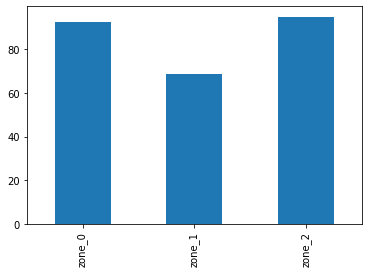

In [ ]:
pred_gen.mean().plot.bar()

In [ ]:
predictions_rmse_geo_0 = pd.Series(rmse_geo_0)

In [ ]:
predictions_rmse_geo_1 = pd.Series(rmse_geo_1)

In [ ]:
predictions_rmse_geo_2 = pd.Series(rmse_geo_2)

In [ ]:
rmse_gen = { 'zone_0': predictions_rmse_geo_0, 'zone_1': predictions_rmse_geo_1, 'zone_2': predictions_rmse_geo_2 }

In [ ]:
rmse_gen = pd.DataFrame(rmse_gen)

Средняя квадратичная ошибка по зонам:

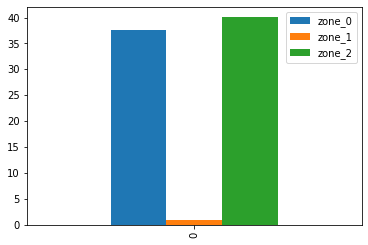

In [ ]:
rmse_gen.plot.bar()

### Вывод

Модели обучены, предсказания сделаны. По средним запасам пока в лидерах 2 зона, 0 немного отстает. RMSE у предсказаний зоны 1 намного ниже, чем у остальных зон. Однако, объем запасов у нее меньше

## Подготовка к расчёту прибыли

Посчитаем минимально необходимые запасы скважины для ее безубыточной разработки

In [ ]:
BUDGET_THE_REGION = 10000000000

In [ ]:
PRICE_THOUSAND_BARREL = 450000

In [ ]:
NUMBER_OF_WELLS = 200

In [ ]:
MIN_STOCKS = BUDGET_THE_REGION / NUMBER_OF_WELLS / PRICE_THOUSAND_BARREL

In [ ]:
MIN_STOCKS

111.11111111111111

### Вывод

Средний запас в скажинах по всем трем регионам значительно уступает запасам, необходимым для безубыточной разработки. Особенно проигрывает 1 регион. Необходимо выделить скважины с наибольшими запасами, чтобы разработка была рентабельной.

## Расчёт прибыли и рисков 

Напишем функцию для расчета прибыли по скважинам с максимальными предсказаниями модели

In [ ]:
def profit(subsample, pred_product, product):
    wells_sorted = subsample.sort_values(by = 'pred_product', ascending=False)[:200]
    real_product = (wells_sorted['product'] - MIN_STOCKS).sum() * PRICE_THOUSAND_BARREL
    return real_product

бутстрепом выберем 500 скважин и выберем 200 лучших

Для региона 0:

In [ ]:
geo_0_val_gen = features_valid_geo_0.copy()

In [ ]:
geo_0_val_gen['product'] = target_valid_geo_0

In [ ]:
geo_0_val_gen['pred_product'] = predictions_valid_geo_0

In [ ]:
values_geo_0 = []
for i in range(1000):
    subsample_0 = geo_0_val_gen.sample(500, replace=True, random_state=state)
    profit_geo_0 = profit(subsample_0, subsample_0['pred_product'], subsample_0['product'])
    values_geo_0.append(profit_geo_0)

Найдем среднюю прибыль, 95% доверительный интервал и риск убытков в 0 регионе

In [ ]:
values_geo_0 = pd.Series(values_geo_0)

Средняя прибыль:

In [ ]:
values_geo_0.mean()

396164984.80237085

In [ ]:
lower_values_geo_0 = values_geo_0.quantile(0.025)
upper_values_geo_0 = values_geo_0.quantile(0.975)

Нижняя и верхняя границы доверительного интервала:

In [ ]:
print('Нижняя граница доверительного интервала:', lower_values_geo_0)
print('Вверхняя граница доверительного интервала:', upper_values_geo_0)

Нижняя граница доверительного интервала: -111215545.89049579
Вверхняя граница доверительного интервала: 909766941.5534223


In [ ]:
total_0 = 0
for i in values_geo_0:
    if i < 0:
        total_0 += 1

In [ ]:
print('Риск убытков:', total_0 / len(values_geo_0))

Риск убытков: 0.069


Для региона 1:

In [ ]:
geo_1_val_gen = features_valid_geo_1.copy()

In [ ]:
geo_1_val_gen['product'] = target_valid_geo_1

In [ ]:
geo_1_val_gen['pred_product'] = predictions_valid_geo_1

In [ ]:
values_geo_1 = []
for i in range(1000):
    subsample_1 = geo_1_val_gen.sample(500, replace=True, random_state=state)
    profit_geo_1 = profit(subsample_1, subsample_1['pred_product'], subsample_1['product'])
    values_geo_1.append(profit_geo_1)

Найдем среднюю прибыль, 95% доверительный интервал и риск убытков в 1 регионе

In [ ]:
values_geo_1 = pd.Series(values_geo_1)

Средняя прибыль:

In [ ]:
values_geo_1.mean()

461155817.2772394

In [ ]:
lower_values_geo_1 = values_geo_1.quantile(0.025)
upper_values_geo_1 = values_geo_1.quantile(0.975)

Нижняя и верхняя границы доверительного интервала:

In [ ]:
print('Нижняя граница доверительного интервала:', lower_values_geo_1)
print('Вверхняя граница доверительного интервала:', upper_values_geo_1)

Нижняя граница доверительного интервала: 78050810.75174218
Вверхняя граница доверительного интервала: 862952060.2637227


In [ ]:
total_1 = 0
for i in values_geo_1:
    if i < 0:
        total_0 += 1

In [ ]:
print('Риск убытков:', total_1 / len(values_geo_1))

Риск убытков: 0.0


Для региона 2:

In [ ]:
geo_2_val_gen = features_valid_geo_2.copy()

In [ ]:
geo_2_val_gen['product'] = target_valid_geo_2

In [ ]:
geo_2_val_gen['pred_product'] = predictions_valid_geo_2

In [ ]:
values_geo_2 = []
for i in range(1000):
    subsample_2 = geo_2_val_gen.sample(500, replace=True, random_state=state)
    profit_geo_2 = profit(subsample_2, subsample_2['pred_product'], subsample_2['product'])
    values_geo_2.append(profit_geo_2)

Найдем среднюю прибыль, 95% доверительный интервал и риск убытков в 0 регионе

In [ ]:
values_geo_2 = pd.Series(values_geo_2)

Средняя прибыль:

In [ ]:
values_geo_2.mean()

392950475.1706043

In [ ]:
lower_values_geo_2 = values_geo_2.quantile(0.025)
upper_values_geo_2 = values_geo_2.quantile(0.975)

Нижняя и верхняя границы доверительного интервала:

In [ ]:
print('Нижняя граница доверительного интервала:', lower_values_geo_2)
print('Вверхняя граница доверительного интервала:', upper_values_geo_2)

Нижняя граница доверительного интервала: -112227625.37857623
Вверхняя граница доверительного интервала: 934562914.5511639


In [ ]:
total_2 = 0
for i in values_geo_2:
    if i < 0:
        total_2 += 1

In [ ]:
print('Риск убытков:', total_2 / len(values_geo_2))

Риск убытков: 0.065


### Вывод

Как бы не было странно на этапе предобработки данных и создания моделей, для разработки я предлагаю выбрать 1 регион. Несмотря на то, что средние запасы всего месторождения меньше, чем у двух других, он выигрывает почти по всем показателя: сердняя прибыль у него больше, 95% доверительный интервал выше и риск получить убыток отсутствует. В этом регионе маленькие запасы, но в нем модель предсказывает точно. Именно из-за этого нам удается выбрать прибыльные скважины и получить максимальную прибыль.